<a href="https://colab.research.google.com/github/VladislavTokarev02/AI_ML_homework/blob/main/Hometasks/Base/AI_HW2_GD_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 2: Градиентный спуск (base)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание: min{10, ваш балл}.

## Задание 1 (0.5 балла)



Найдите экстремумы следующих функций (вручную, где возможно) и укажите их тип (максимум, минимум):

a) $f(x) = x^2 - 30x + 1$

b) $g(x) = -x^3 + 5x - 7x^2 + 17$

c) $h(x) = x^2 - 1/x$

d) $j(x) = 1/x^5 + x^{17} + 8$

## Задание 2 (1 балл)

Найдите экстремумы этих функций в Python.

In [1]:
!pip install sympy

In [2]:
import sympy as sp

In [5]:
def f(x):
  return x**2 - 30*x + 1
def g(x):
  return -x**3 - 7*x**2 + 5*x +17
def h(x):
  return x**2 - 1/x
def j(x):
  return 1/x**5 + x**17 + 8

In [3]:
x = sp.Symbol('x', real = True) #только на вещественных

In [6]:
df_x = sp.diff(f(x))
min_dfx = sp.solve(df_x)
min_dfx = min_dfx[0]
f_min_dfx = f(min_dfx)
print(f"точка минимума для f(x): x={min_dfx}")
print(f"значение функции в точке минимума: {f_min_dfx}")

точка минимума для f(x): x=15
значение функции в точке минимума: -224


In [8]:
dg_x = sp.diff(g(x))
solver = sp.solve(dg_x)
dg_x2 = sp.diff(dg_x)
min_dgx = dg_x2.subs(x, solver[0]) # 16>0 - точка минимума
max_dgx = dg_x2.subs(x, solver[1])
f_min_dgx = f(min_dgx)
f_max_dgx = f(max_dgx)
print(f"точка минимума для g(x) = {min_dgx}")
print(f"значение функции в точке минимума = {f_min_dgx}")
print(f"точка максимума для g(x) = {max_dgx}")
print(f"значение функции в точке максимума = {f_max_dgx}")

точка минимума для g(x) = 16
значение функции в точке минимума = -223
точка максимума для g(x) = -16
значение функции в точке максимума = 737


In [12]:
dh_x = sp.diff(h(x))
solver = sp.solve(dh_x)
dh_x2 = sp.diff(dh_x)
solver
print(f"точка минимума для h(x) = {min_dhx}")

точка минимума для h(x) = 6


In [13]:
dj_x = sp.diff(j(x))
solver = sp.solve(dj_x)
dj_x2 = sp.diff(dj_x)
max_djx = dj_x2.subs(x, solver[0]) # <0 - точка максимума
min_djx = dj_x2.subs(x, solver[1]) # >0 - точка минимума
print(f"точка максимума для j(x) = {max_djx}")
print(f"точка минимума для j(x) = {min_djx}")

точка максимума для j(x) = -22*17**(7/22)*5**(15/22)
точка минимума для j(x) = 22*17**(7/22)*5**(15/22)


## Задание 3 (1 балл)

Найдите точки перегиба функций из задания 1 (вручную, где возможно).

## Задание 4 (1 балла)

Найдите точки перегиба этих функций в Python.

In [ ]:
d2f_x = sp.diff(df_x)
print(d2f_x) #нет точек перегиба

2


In [ ]:
d2g_x = sp.diff(dg_x)
print(d2g_x)
solver_d2g_x = sp.solve(d2g_x)
infl_gx = solver_d2g_x[0]
f"точка перегиба = {infl_gx}"

-6*x - 14


'точка перегиба = -7/3'

In [ ]:
d2h_x = sp.diff(dh_x)
print(d2h_x)
infl_hx = sp.solve(d2h_x)
f"точки перегиба = {infl_hx}"

2 - 2/x**3


'точки перегиба = [1, -1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2]'

In [ ]:
d2j_x = sp.diff(dj_x)
print(d2j_x)
infl_jx = sp.solve(d2j_x)
f"точки перегиба = {infl_hx}"

272*x**15 + 30/x**7


'точки перегиба = [1, -1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2]'

### Внимание! Далее все задания необходимо выполнять для ВСЕХ функций из задания 1!

## Задание 5 (1 балл)

Постройте графики функций из задания 1 в Python (не забудьте подписать оси и сами графики):
*   изобразите графики с подписанными осями
*   отметьте одним цветом локальные экстремумы
*   отметьте другим цветом точки перегиба
*   подпишите на оси x значения экстремумов и точек перегиба

P.S. Для того, чтобы отметить точку на графике, вам понадобится функция (plt.scatter), а для того, чтобы подписать её значение на оси (plt.annotate).

Пример хорошего графика:

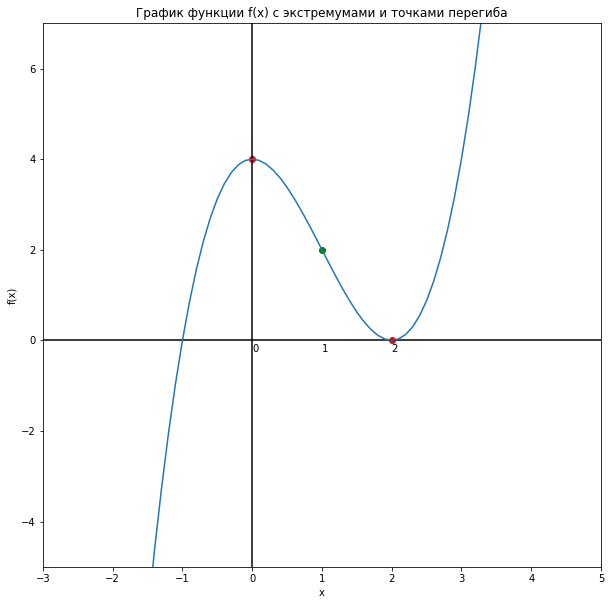

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
extremums = [min_dfx, min_dgx, max_dgx, min_dhx, max_dhx, min_djx, max_djx]
extr_values =

[15,
 16,
 -16,
 6,
 2 - 2/(2**(2/3)/4 - 2**(2/3)*sqrt(3)*I/4)**3,
 22*17**(7/22)*5**(15/22),
 -22*17**(7/22)*5**(15/22)]

In [ ]:
inflection_points = [infl_gx, infl_hx, infl_jx]
inflection_points

[-7/3,
 [1, -1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2],
 [-543361077710752838169347099197440**(1/22)*cos(pi/22)/34 - 543361077710752838169347099197440**(1/22)*I*sin(pi/22)/34,
  543361077710752838169347099197440**(1/22)*cos(pi/22)/34 + 543361077710752838169347099197440**(1/22)*I*sin(pi/22)/34,
  -543361077710752838169347099197440**(1/22)*sin(pi/22)*sin(pi/11)/34 + 543361077710752838169347099197440**(1/22)*cos(pi/22)*cos(pi/11)/34 + 543361077710752838169347099197440**(1/22)*I*sin(pi/22)*cos(pi/11)/34 + 543361077710752838169347099197440**(1/22)*I*sin(pi/11)*cos(pi/22)/34,
  543361077710752838169347099197440**(1/22)*sin(pi/22)*sin(pi/11)/34 + 543361077710752838169347099197440**(1/22)*cos(pi/22)*cos(pi/11)/34 - 543361077710752838169347099197440**(1/22)*I*sin(pi/11)*cos(pi/22)/34 + 543361077710752838169347099197440**(1/22)*I*sin(pi/22)*cos(pi/11)/34,
  -543361077710752838169347099197440**(1/22)*sin(pi/22)*sin(2*pi/11)/34 + 543361077710752838169347099197440**(1/22)*cos(pi/22)*cos(2*pi/11)/34 + 

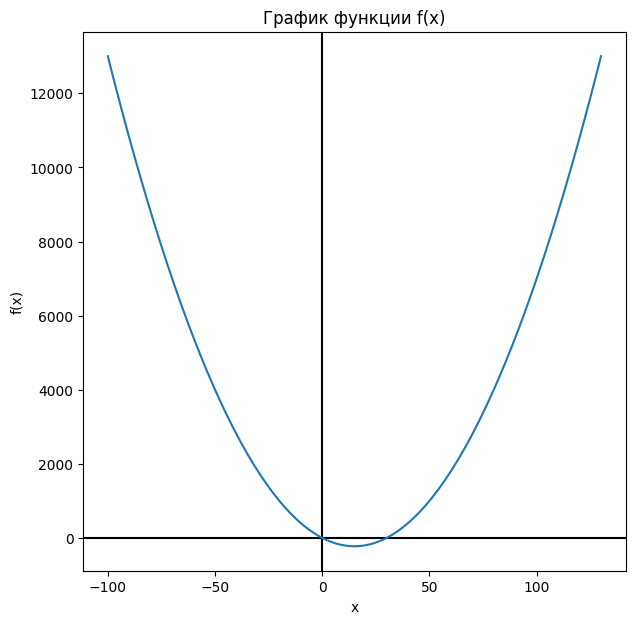

In [ ]:
import numpy as np


x_values = np.linspace(-100, 130, 150)

f_values = [f(x) for x in x_values] # список значений функции

plt.figure(figsize=(7,7))
plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')
plt.title('График функции f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x_values, f_values)



plt.scatter(extremums[0], , color="red", label="Экстремумы")
for x_pt, y_pt in zip(extrema, extrema_y):
    plt.annotate(f"({x_pt:.2f}, {y_pt:.2f})", (x_pt, y_pt), textcoords="offset points", xytext=(-20, 10), ha="center")

# Отмечаем точки перегиба
plt.scatter(inflection, inflection_y, color="green", label="Точки перегиба")
for x_pt, y_pt in zip(inflection, inflection_y):
    plt.annotate(f"({x_pt:.2f}, {y_pt:.2f})", (x_pt, y_pt), textcoords="offset points", xytext=(-20, -20), ha="center")

## Задание 6 (1 балл)

Модифицируйте функцию, осуществляющую метод градиентного спуска с семинара: добавьте опцию останавливать метод, если абсолютное значение производной функции в точке < некоторого $\delta$ (delta добавьте в аргументы функции).

In [ ]:
# your code here

## Задание 7 (1 балл)

Подберите начальное приближение (сделайте несколько запусков из случайной начальной точки) и шаг градиентного спуска таким образом, чтобы процедура выдавала правильное значение наименьшего локального минимума функций (если он есть):
- [ ] в качестве результата выведите на экран значение начального приближения ($x_0$), `learning_rate`
- [ ] нарисуйте график функции и изобразите на нём наименьший из найденных локальных минимумов; на оси $x$ подпишите значение этого минимума. \
(Постарайтесь сделать реализацию графика в виде функции, чтобы оптимизировать процесс. Потом функция понадобится вам в задании 9, но это не обязательное требование).
- [ ] если такой точки у функции нет, поясните это текстом при помощи Markdown

In [ ]:
# your code here

## Задание 8 (1.5 балла)

Реализуйте [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Про метод ещё можно почитать [здесь](https://math.semestr.ru/optim/minimum.php).

In [ ]:
# your code here

## Задание 9 (0.5 балла)

Примените метод Ньютона для поиска минимума указанных функций (в ответе выведите подходящее значение начальной точки, график с найденным и подписанным значением минимума, как в задании 7).

In [ ]:
# your code here

## Задание 10 (1 балл)

Сравните скорость работы градиентного спуска и метода Ньютона при одинаковой точности решения $|x_{found}-x_{true}|<10^{-5}$:
* за сколько итераций каждый метод сходится (в среднем по всем функциям для правильно подобранных значений гиперпараметров)? Какой быстрее?
* какой метод дает более точный результат при фиксированном числе итераций $N=10$? (для ответа на этот вопрос добавьте в процедуру градиентного спуска возможность останавливаться при достижении некоторого количества итераций $N$)

In [ ]:
# your code here

## **Бонусная часть**

## Задание 11 (1 балл)

Реализуйте оптимизацию метода градиентного спуска - Momentum. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

In [ ]:
# your code here

## Задание 12 (0.5 балла)

Проверьте, решает ли Momentum GD проблему поиска начального приближения для функций из задания 1?

In [ ]:
# your code here

## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!


[Кайфующий кот](https://ibb.co/12WN7wg)